In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
dataset=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv' ,header=1)

In [6]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


**DATA CLEANING**

In [8]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [11]:
df=dataset
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [13]:
df['Region']=df['Region'].astype(int)


In [14]:
#Remove the null values
df=df.dropna().reset_index(drop=True)

In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [31]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [30]:
# Check the current length of your DataFrame
print(len(df))

# Drop the last row of the DataFrame
df = df.drop(df.index[-1]).reset_index(drop=True)
print("Dropped the last row of the DataFrame")

243
Dropped the last row of the DataFrame


In [32]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

**Changes the required columns as integer data type**

In [34]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']]= df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          242 non-null    int64 
 1   month        242 non-null    int64 
 2   year         242 non-null    int64 
 3   Temperature  242 non-null    int64 
 4   RH           242 non-null    int64 
 5   Ws           242 non-null    int64 
 6   Rain         242 non-null    object
 7   FFMC         242 non-null    object
 8   DMC          242 non-null    object
 9   DC           242 non-null    object
 10  ISI          242 non-null    object
 11  BUI          242 non-null    object
 12  FWI          242 non-null    object
 13  Classes      242 non-null    object
 14  Region       242 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.5+ KB


In [38]:
#changing the other columns to float datatype
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI','FWI']].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int64  
 1   month        242 non-null    int64  
 2   year         242 non-null    int64  
 3   Temperature  242 non-null    int64  
 4   RH           242 non-null    int64  
 5   Ws           242 non-null    int64  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.5+ KB


In [40]:
#let save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

**Exploratory Data Analysis**

In [41]:
#drop date
df_copy=df.drop(['day','month','year'],axis=1)

In [42]:
#Encoding the categorical variables
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
Name: count, dtype: int64

In [43]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [44]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [45]:
df_copy['Classes'].value_counts()

Classes
1    137
0    105
Name: count, dtype: int64

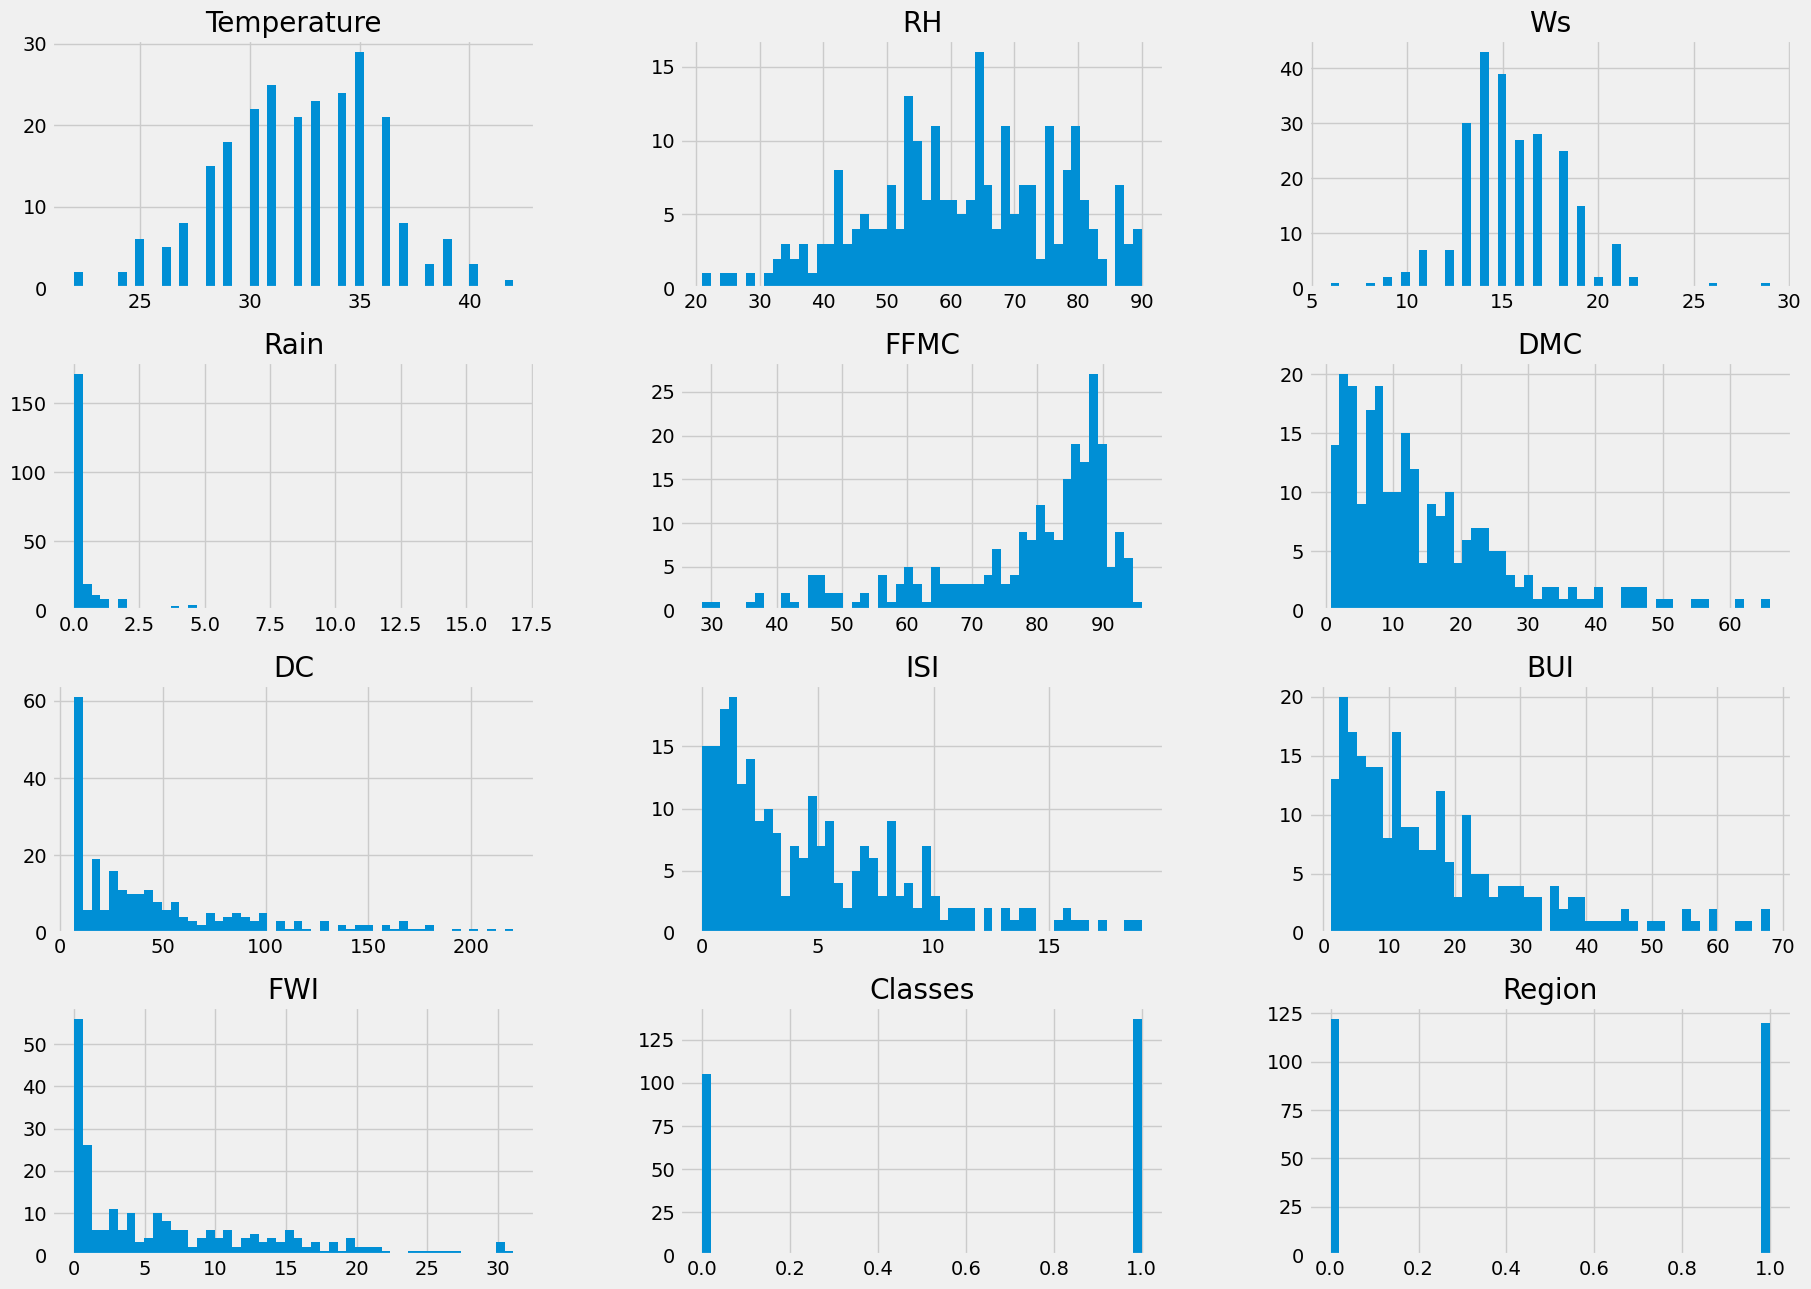

In [46]:
#density plot for all features
plt.style.use('fivethirtyeight')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [48]:
#Percentage for the Pie Chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.61157
0    43.38843
Name: proportion, dtype: float64

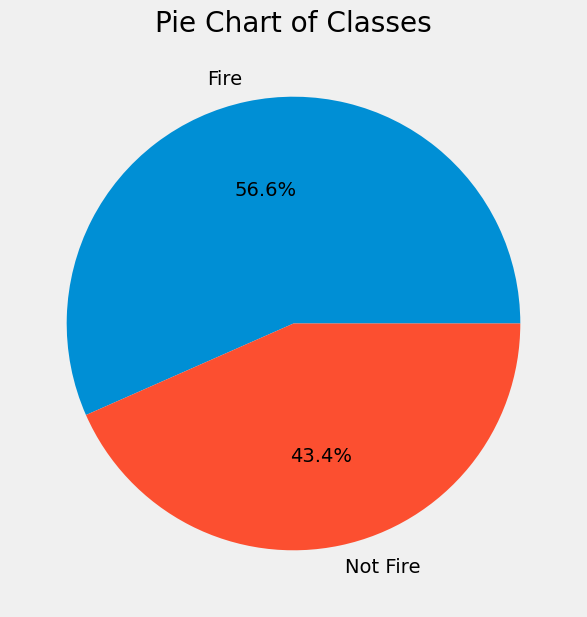

In [49]:
#ploting piechart
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [50]:
#correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.657112,-0.289211,-0.332669,0.677605,0.483357,0.374149,0.603173,0.457472,0.565330,0.512186,0.282455
RH,-0.657112,1.000000,0.244169,0.222555,-0.645217,-0.408707,-0.226795,-0.687262,-0.353908,-0.581428,-0.432712,-0.404088
Ws,-0.289211,0.244169,1.000000,0.171340,-0.167282,-0.001363,0.078714,0.007923,0.030876,0.031781,-0.070985,-0.180818
Rain,-0.332669,0.222555,0.171340,1.000000,-0.545463,-0.290309,-0.299174,-0.349062,-0.301312,-0.326021,-0.381503,-0.038932
FFMC,0.677605,-0.645217,-0.167282,-0.545463,1.000000,0.602570,0.506359,0.739351,0.590982,0.690332,0.768949,0.226019
DMC,0.483357,-0.408707,-0.001363,-0.290309,0.602570,1.000000,0.875676,0.679459,0.982198,0.875466,0.584019,0.196463
DC,0.374149,-0.226795,0.078714,-0.299174,0.506359,0.875676,1.000000,0.507467,0.941890,0.738917,0.509738,-0.076095
ISI,0.603173,-0.687262,0.007923,-0.349062,0.739351,0.679459,0.507467,1.000000,0.643038,0.922656,0.734252,0.267704
BUI,0.457472,-0.353908,0.030876,-0.301312,0.590982,0.982198,0.941890,0.643038,1.000000,0.857542,0.585116,0.093212
FWI,0.565330,-0.581428,0.031781,-0.326021,0.690332,0.875466,0.738917,0.922656,0.857542,1.000000,0.718149,0.201497


Text(0.5, 1.0, 'Correlation Heatmap')

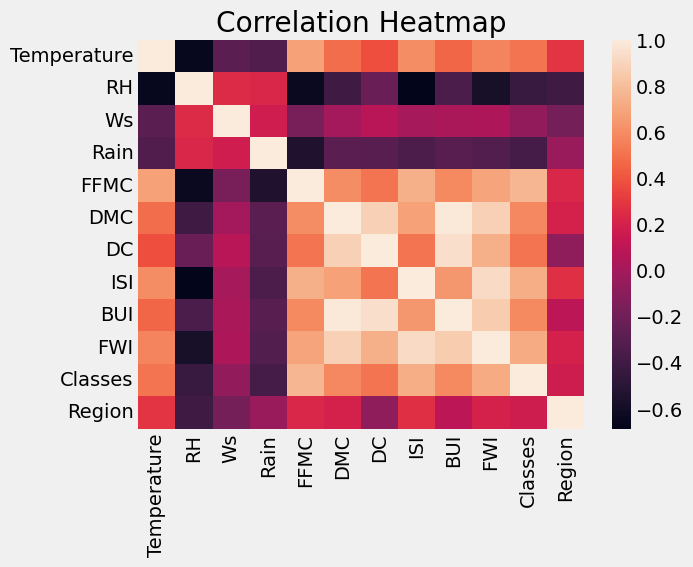

In [53]:
#ploting correlation
sns.heatmap(df_copy.corr()).set_title('Correlation Heatmap')

In [55]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

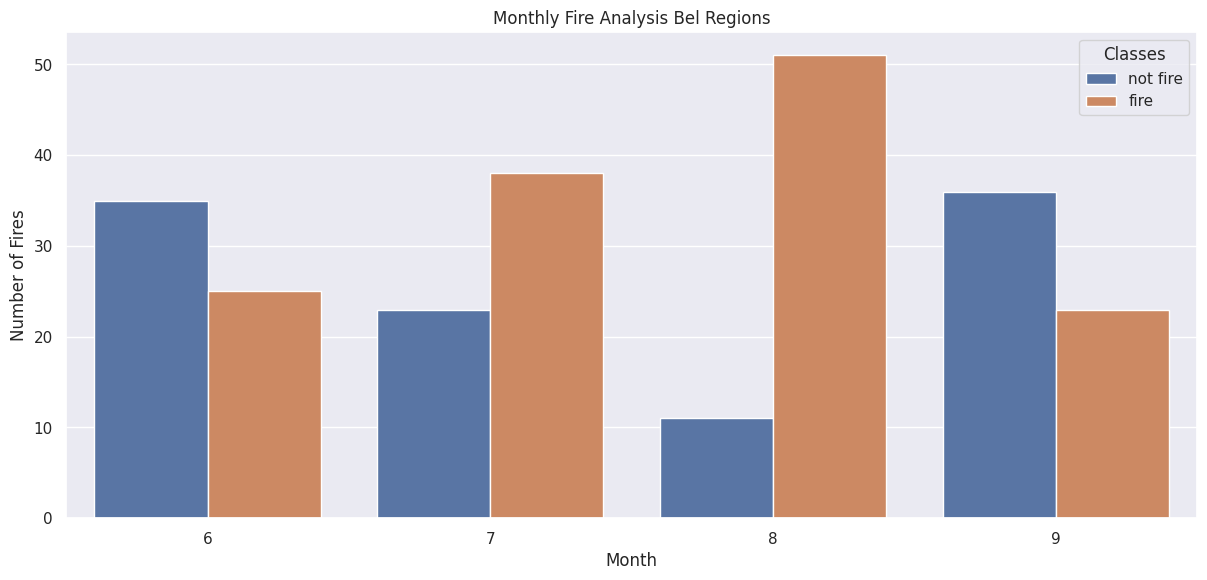

In [59]:
#monthly fire anlysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.set(style='darkgrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.title('Monthly Fire Analysis Bel Regions')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

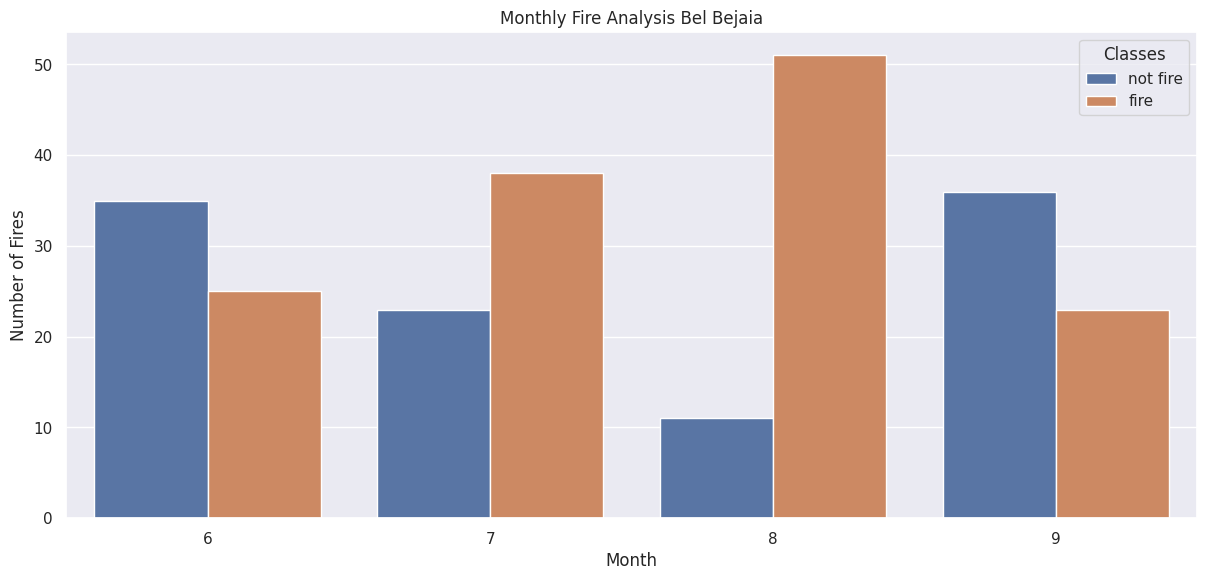

In [60]:
#monthly fire anlysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.set(style='darkgrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.title('Monthly Fire Analysis Bel Bejaia')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

# **Key Observations:**

1*.Similar Patterns:* Both regions (Bel and Bel Bejaia) show very similar monthly patterns in fire and non-fire incidents.


*  June and July have more 'not fire' than 'fire' incidents.
*   August shows a sharp increase in 'fire' incidents.

*   September balances out but with a tendency towards more 'not fire' incidents.


2.*Peak Fire Month*: August is consistently the peak month for fire incidents in both regions.

3.*Monthly Consistency*: The patterns are nearly identical in both regions, indicating that they may be subject to similar conditions or external factors influencing fire occurrences.




# Model training

In [62]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [64]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [65]:
 df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [66]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [67]:
#Independent and Dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [68]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [69]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
237    3.0
238    6.5
239    0.0
240    0.2
241    0.7
Name: FWI, Length: 242, dtype: float64

In [70]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
#Feature selction based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.633157,-0.304238,-0.326443,0.689976,0.491812,0.380091,0.593680,0.465783,0.499988,0.281145
RH,-0.633157,1.000000,0.229683,0.228337,-0.637861,-0.419759,-0.226987,-0.701597,-0.360961,-0.414945,-0.422905
Ws,-0.304238,0.229683,1.000000,0.220611,-0.154713,0.027686,0.125023,0.011420,0.064717,-0.025006,-0.228959
Rain,-0.326443,0.228337,0.220611,1.000000,-0.542957,-0.298835,-0.307501,-0.354730,-0.309006,-0.385862,-0.049773
FFMC,0.689976,-0.637861,-0.154713,-0.542957,1.000000,0.626782,0.521537,0.754072,0.609809,0.789632,0.256267
DMC,0.491812,-0.419759,0.027686,-0.298835,0.626782,1.000000,0.865450,0.692475,0.982589,0.605210,0.202501
DC,0.380091,-0.226987,0.125023,-0.307501,0.521537,0.865450,1.000000,0.515981,0.941388,0.522873,-0.071819
ISI,0.593680,-0.701597,0.011420,-0.354730,0.754072,0.692475,0.515981,1.000000,0.648621,0.742436,0.283996
BUI,0.465783,-0.360961,0.064717,-0.309006,0.609809,0.982589,0.941388,0.648621,1.000000,0.594826,0.102944
Classes,0.499988,-0.414945,-0.025006,-0.385862,0.789632,0.605210,0.522873,0.742436,0.594826,1.000000,0.207774


<Axes: >

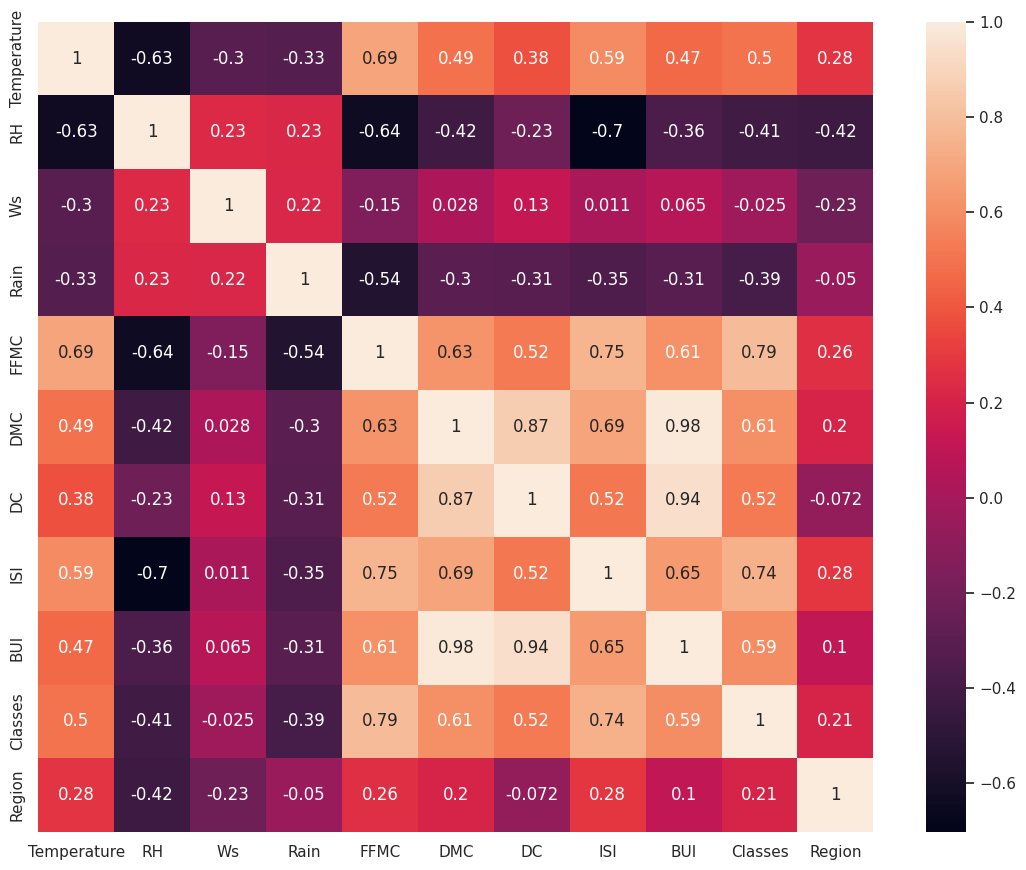

In [72]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corrmat=X_train.corr()
sns.heatmap(corrmat,annot=True)

In [73]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features=correlation(dataset=X_train,threshold=0.85)

In [78]:
#Drop features whem correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

# Stadardization

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<ipython-input-81-caeeb757a94a>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

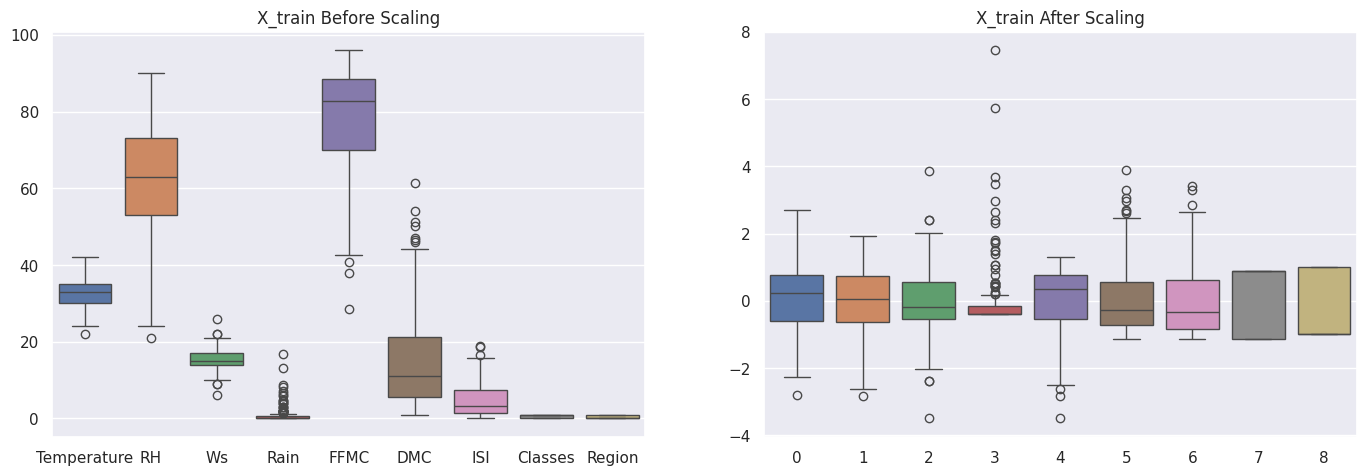

In [81]:
#Box plot to understand the effect of standardization
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

Mean Absolute Error: 0.6366727439733841
R2 Score: 0.985057750950581


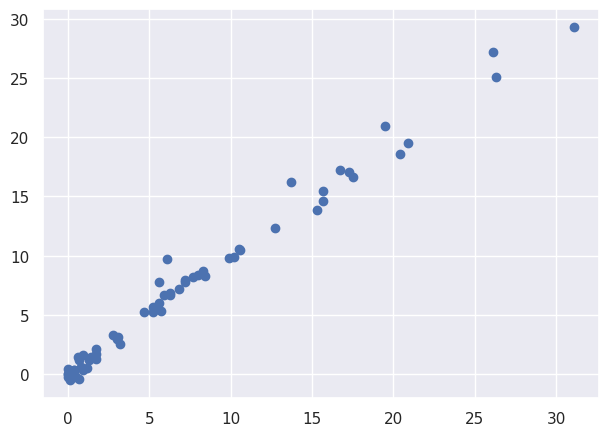

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()


# Lasso Regression

Mean Absolute Error: 1.2062384178548038
R2 Score: 0.9529838993744264


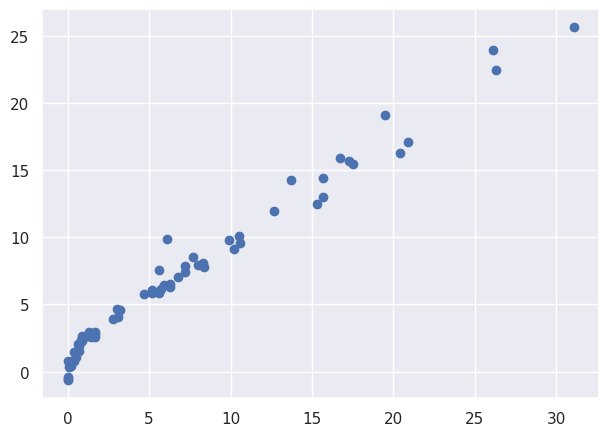

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

# Cross Validation

Mean Absolute Error: 0.6383502030988094
R2 Score: 0.9848128199116748


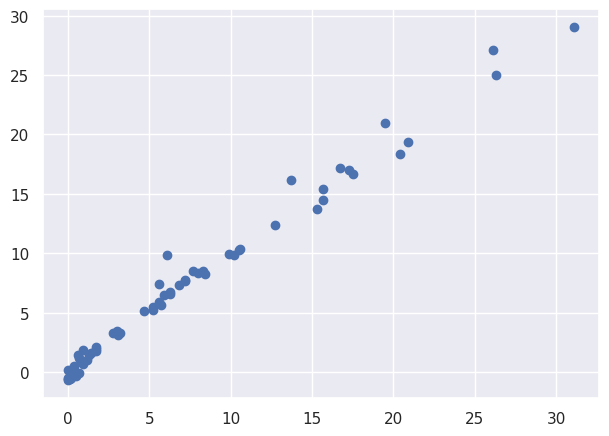

In [91]:
  #cross validation for lasso
  from sklearn.linear_model import LassoCV
  lassocv=LassoCV(cv=5)
  lassocv.fit(X_train_scaled,y_train)
  y_pred=lassocv.predict(X_test_scaled)
  mae=mean_absolute_error(y_test,y_pred)
  score=r2_score(y_test,y_pred)
  print("Mean Absolute Error:",mae)
  print("R2 Score:",score)
  plt.scatter(y_test,y_pred)
  plt.show()


# Ridge Regression


Mean Absolute Error: 0.655291303493837
R2 Score: 0.9845526307835616


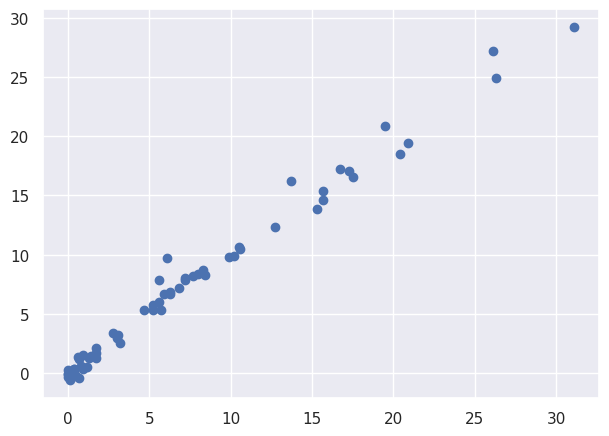

In [89]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()

# Elasticnet Regression

Mean Absolute Error: 1.9223191316399504
R2 Score: 0.8839425149598209


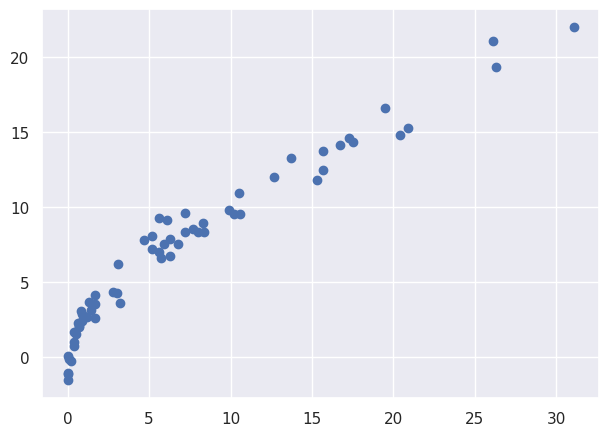

In [90]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",score)
plt.scatter(y_test,y_pred)
plt.show()